# TripAdvisor Review NLP Project

## Importing packages, data and checking data integrity

In [1]:
# Standard Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Ingest Data
tripAdvisor_df = pd.read_csv('data/tripadvisor_hotel_reviews.csv')

In [3]:
# View data
tripAdvisor_df

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [4]:
# Look at rating stats
tripAdvisor_df.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [5]:
# Check for nulls
nulls_count = tripAdvisor_df.isnull().sum()
print(nulls_count)

Review    0
Rating    0
dtype: int64


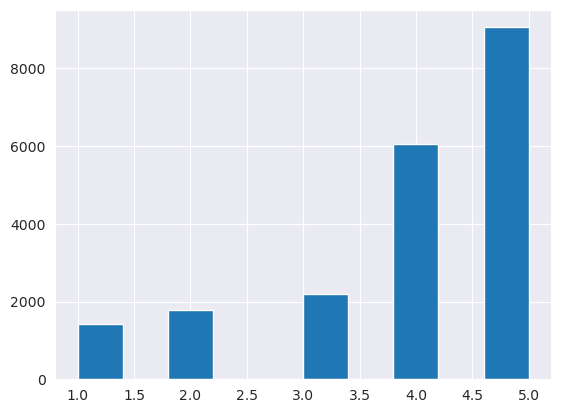

In [6]:
# Look at distribution
tripAdvisor_df['Rating'].hist()
plt.show()

In [7]:
# Check all values are correct
print(tripAdvisor_df['Rating'].unique())

[4 2 3 5 1]


In [8]:
# Check data types
tripAdvisor_df.dtypes

Review    object
Rating     int64
dtype: object

The data is imported and is shaped expected.

## EDA

I've always been curious if the length of a review correlates in any way at all with how good or bad the review is.

In [9]:
# Create data copy for exploration
eda_df = tripAdvisor_df.copy()

# Create new column based off the length of the review
eda_df['review_length'] = eda_df['Review'].str.len()

eda_df

,Review,Rating,review_length
0,nice hotel expensive parking got good deal sta...,4,593
1,ok nothing special charge diamond member hilto...,2,1689
2,nice rooms not 4* experience hotel monaco seat...,3,1427
3,"unique, great stay, wonderful time hotel monac...",5,600
4,"great stay great stay, went seahawk game aweso...",5,1281
...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,733
20487,great location price view hotel great quick pl...,4,306
20488,"ok just looks nice modern outside, desk staff ...",2,443
20489,hotel theft ruined vacation hotel opened sept ...,1,5557


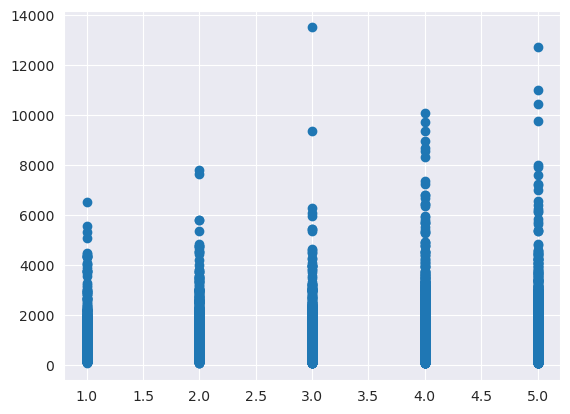

In [10]:
# Create scatter plot to see the shape of the data
plt.scatter(eda_df['Rating'], eda_df['review_length'])
plt.show()

Scatter plot isn't the best for displaying this. A violin plot would be better.

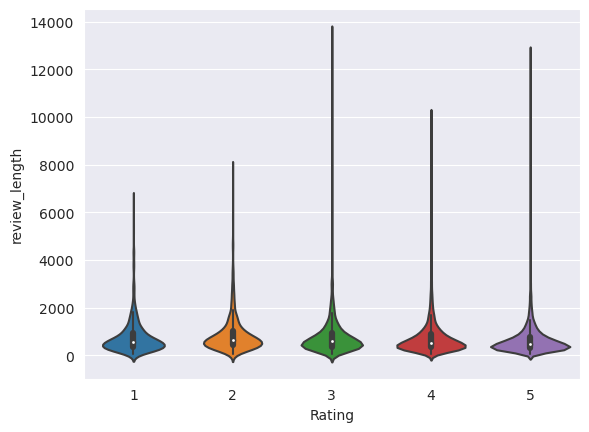

In [11]:
# Seaborn violin plot
sns.violinplot(x="Rating", y="review_length", data=eda_df)

plt.show()

That shows us there might be a coloration, but it also might just be a coincidence that some people get really passionate about certain things. Perhaps averages?

In [12]:
# Mean lengths by rating
mean_lengths = eda_df.groupby('Rating')['review_length'].mean()

print(mean_lengths)

Rating
1    769.534835
2    867.002789
3    784.664835
4    745.339957
5    661.696488
Name: review_length, dtype: float64


It seems like there's a spike in review length of ratings at locations that have a rating of 2 that tapers off the higher the rating goes. This makes sense as people are much more negatively inclined to so will want to vent over a negative review.

## Data Pre-processing

In [13]:
# Text processing imports
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Feature extractions
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [14]:
# Clean the text of random tags, convert to lowercase and remove special characters.

def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

tripAdvisor_df['cleaned_reviews'] = tripAdvisor_df['Review'].apply(clean_text)

In [15]:
# Tokenize reviews
tripAdvisor_df['tokenized_reviews'] = tripAdvisor_df['cleaned_reviews'].apply(word_tokenize)

In [16]:
# Set stop words to english
stop_words = set(stopwords.words('english'))

# Function with list comprehension to remove stop words
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

tripAdvisor_df['filtered_reviews'] = tripAdvisor_df['tokenized_reviews'].apply(remove_stopwords)

In [17]:
# Set up lemmatizer
lemmatizer = WordNetLemmatizer()

# Function with list comprehension to apply lemmatizer
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

tripAdvisor_df['lemmatized_reviews'] = tripAdvisor_df['filtered_reviews'].apply(lemmatize_tokens)

In [18]:
tripAdvisor_df

,Review,Rating,cleaned_reviews,tokenized_reviews,filtered_reviews,lemmatized_reviews
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member..."
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not 4 experience hotel monaco seatt...,"[nice, rooms, not, 4, experience, hotel, monac...","[nice, rooms, 4, experience, hotel, monaco, se...","[nice, room, 4, experience, hotel, monaco, sea..."
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...,"[unique, great, stay, wonderful, time, hotel, ...","[unique, great, stay, wonderful, time, hotel, ...","[unique, great, stay, wonderful, time, hotel, ..."
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game..."
...,...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,best kept secret 3rd time staying charm not 5s...,"[best, kept, secret, 3rd, time, staying, charm...","[best, kept, secret, 3rd, time, staying, charm...","[best, kept, secret, 3rd, time, staying, charm..."
20487,great location price view hotel great quick pl...,4,great location price view hotel great quick pl...,"[great, location, price, view, hotel, great, q...","[great, location, price, view, hotel, great, q...","[great, location, price, view, hotel, great, q..."
20488,"ok just looks nice modern outside, desk staff ...",2,ok just looks nice modern outside desk staff n...,"[ok, just, looks, nice, modern, outside, desk,...","[ok, looks, nice, modern, outside, desk, staff...","[ok, look, nice, modern, outside, desk, staff,..."
20489,hotel theft ruined vacation hotel opened sept ...,1,hotel theft ruined vacation hotel opened sept ...,"[hotel, theft, ruined, vacation, hotel, opened...","[hotel, theft, ruined, vacation, hotel, opened...","[hotel, theft, ruined, vacation, hotel, opened..."


Initially pre-processing done, we can move into creating n-grams and vectorizing.

In [19]:
# Create a CountVectorizer with bigrams and trigrams
ngram_vectorizer = CountVectorizer(ngram_range=(2, 3))

# Fit and transform n_grams
X_ngrams = ngram_vectorizer.fit_transform(tripAdvisor_df['lemmatized_reviews'].apply(lambda x: ' '.join(x)))

# Use tf-idf to create weighted n-grams
tfidf_transformer = TfidfTransformer()
X_ngrams_tfidf = tfidf_transformer.fit_transform(X_ngrams)

In [20]:
# Create a vectorizer for the reviews 
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(tripAdvisor_df['lemmatized_reviews'].apply(lambda x: ' '.join(x)))

In [21]:
# Combine both the weighted n-grams and the tf-idf reviews themselves
# Combine X_ngrams_tfidf and X_tfidf horizontally
from scipy.sparse import hstack
X_combined = hstack([X_ngrams_tfidf, X_tfidf])

Check that features and targets are equal before we start to try and learn.

In [22]:
print(X_combined.shape[0])

20491


In [23]:
y = tripAdvisor_df['Rating']
len(y)

20491

## Classification Algorithm

There are a number of options that could be used for this classification problem. For this project, I'll pick 3. SVMs, logistic regression and Random Forests. We'll also use randomized search to find the best parameters for each.

In [24]:
# Machine Learning Imports
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

### SVM Classifier

In [25]:
# Create an SVM classifier
svm_classifier = LinearSVC()

# Define a grid of hyperparameters to search
param_grid = {
    'C': [0.1, 1.0, 10.0],  # Regularization parameter
    'class_weight': [None, 'balanced'],  # Class weighting
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'loss': ['hinge', 'squared_hinge'],  # Loss function
    'dual': [True, False],  # Dual or primal formulation
    'multi_class': ['ovr', 'crammer_singer'],  # Multiclass strategy
}

In [26]:
# Create a GridSearchCV object
random_search = RandomizedSearchCV(estimator=svm_classifier, param_distributions=param_grid, n_iter=10, scoring='accuracy', cv=5, verbose=2, random_state=13)

# Perform the grid search on your data
random_search.fit(X_combined, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/ross/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=10.0, class_weight=balanced, dual=False, loss=squared_hinge, multi_class=crammer_singer, penalty=l1; total time=  19.0s
[CV] END C=10.0, class_weight=balanced, dual=False, loss=squared_hinge, multi_class=crammer_singer, penalty=l1; total time=  23.5s
[CV] END C=10.0, class_weight=balanced, dual=False, loss=squared_hinge, multi_class=crammer_singer, penalty=l1; total time=  20.5s
[CV] END C=10.0, class_weight=balanced, dual=False, loss=squared_hinge, multi_class=crammer_singer, penalty=l1; total time=   3.6s
[CV] END C=10.0, class_weight=balanced, dual=False, loss=squared_hinge, multi_class=crammer_singer, penalty=l1; total time=   3.5s
[CV] END C=1.0, class_weight=None, dual=True, loss=hinge, multi_class=ovr, penalty=l2; total time=   7.4s
[CV] END C=1.0, class_weight=None, dual=True, loss=hinge, multi_class=ovr, penalty=l2; total time=   6.1s
[CV] END C=1.0, class_weight=None, dual=True, loss=hinge, multi_class=ovr, penalty=l2; total time=   8.9s
[CV] END C=1.0, class_weigh

/home/ross/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LinearSVC(),
                   param_distributions={'C': [0.1, 1.0, 10.0],
                                        'class_weight': [None, 'balanced'],
                                        'dual': [True, False],
                                        'loss': ['hinge', 'squared_hinge'],
                                        'multi_class': ['ovr',
                                                        'crammer_singer'],
                                        'penalty': ['l1', 'l2']},
                   random_state=13, scoring='accuracy', verbose=2)

In [27]:
# Print the best parameters and the corresponding cross-validated accuracy
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

Best Parameters: {'penalty': 'l1', 'multi_class': 'crammer_singer', 'loss': 'squared_hinge', 'dual': False, 'class_weight': 'balanced', 'C': 10.0}
Best Accuracy: 0.595188615680883


### Logistic Regression

In [28]:
# Create a Logistic Regression classifier
logistic_classifier = LogisticRegression(solver='liblinear', random_state=13)

# Define a parameter distribution for Randomized Search
param_dist = {
    'C': [0.001, 0.01, 0.1, 1.0, 10.0],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'class_weight': [None, 'balanced'],  # Class weighting
    'fit_intercept': [True, False],  # Intercept fitting
    'max_iter': [100, 200, 300, 400],  # Maximum number of iterations
}

In [29]:
# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=logistic_classifier, param_distributions=param_dist, n_iter=10, scoring='accuracy', cv=5, verbose=2, random_state=13)

# Perform the randomized search
random_search.fit(X_combined, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END C=0.001, class_weight=balanced, fit_intercept=False, max_iter=400, penalty=l1; total time=   1.9s
[CV] END C=0.001, class_weight=balanced, fit_intercept=False, max_iter=400, penalty=l1; total time=   1.9s
[CV] END C=0.001, class_weight=balanced, fit_intercept=False, max_iter=400, penalty=l1; total time=   2.0s
[CV] END C=0.001, class_weight=balanced, fit_intercept=False, max_iter=400, penalty=l1; total time=   1.9s
[CV] END C=0.001, class_weight=balanced, fit_intercept=False, max_iter=400, penalty=l1; total time=   1.9s
[CV] END C=0.01, class_weight=balanced, fit_intercept=True, max_iter=400, penalty=l1; total time=   7.3s
[CV] END C=0.01, class_weight=balanced, fit_intercept=True, max_iter=400, penalty=l1; total time=   7.3s
[CV] END C=0.01, class_weight=balanced, fit_intercept=True, max_iter=400, penalty=l1; total time=   7.3s
[CV] END C=0.01, class_weight=balanced, fit_intercept=True, max_iter=400, penalty=l1; tot

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(random_state=13,
                                                solver='liblinear'),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1.0, 10.0],
                                        'class_weight': [None, 'balanced'],
                                        'fit_intercept': [True, False],
                                        'max_iter': [100, 200, 300, 400],
                                        'penalty': ['l1', 'l2']},
                   random_state=13, scoring='accuracy', verbose=2)

In [30]:
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

Best Parameters: {'penalty': 'l2', 'max_iter': 400, 'fit_intercept': False, 'class_weight': 'balanced', 'C': 1.0}
Best Accuracy: 0.615587346412027


### Random Forest

In [31]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=13)

# Define a parameter distribution for Randomized Search
param_dist = {
    'n_estimators': [50, 100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at a leaf node
    'bootstrap': [True, False],  # Whether to use bootstrapping
    'class_weight': [None, 'balanced', 'balanced_subsample'],  # Class weighting
}

In [32]:
# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist, n_iter=10, scoring='accuracy', cv=5, verbose=2, random_state=13)

# Perform the randomized search
random_search.fit(X_combined, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=False, class_weight=balanced, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  18.4s
[CV] END bootstrap=False, class_weight=balanced, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  18.8s
[CV] END bootstrap=False, class_weight=balanced, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  18.9s
[CV] END bootstrap=False, class_weight=balanced, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  18.6s
[CV] END bootstrap=False, class_weight=balanced, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  17.5s
[CV] END bootstrap=True, class_weight=balanced, max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=  49.0s
[CV] END bootstrap=True, class_weight=balanced, max_depth=30, min_samples_leaf=4, min_samples_spli

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=13),
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': [None, 'balanced',
                                                         'balanced_subsample'],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300]},
                   random_state=13, scoring='accuracy', verbose=2)

In [33]:
# Print the best parameters and the corresponding cross-validated accuracy
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None, 'class_weight': 'balanced_subsample', 'bootstrap': False}
Best Accuracy: 0.5898198455955463


So the best accuracy we get is with logistic regression at 61.55%. With 5 choices I'd say that's a pretty successful model.

## Trying new reviews

Let's take the best parameters from our random search validation, fit and then predict the models on a range of reviews.

In [34]:
# Create an SVM classifier with the "best" parameters
best_svm_classifier = LinearSVC(penalty='l1', multi_class='crammer_singer', loss='squared_hinge', dual=False, class_weight='balanced', C=10.0)

# Fit the model
best_svm_classifier.fit(X_combined, y)

LinearSVC(C=10.0, class_weight='balanced', dual=False,
          multi_class='crammer_singer', penalty='l1')

In [35]:
# Create a logistic regression model from the "best" parameters
best_lr_class = LogisticRegression(solver='liblinear', random_state=13, penalty = 'l2', max_iter = 400, fit_intercept = False, class_weight = 'balanced', C=1.0)

# Fit model
best_lr_class.fit(X_combined, y)

LogisticRegression(class_weight='balanced', fit_intercept=False, max_iter=400,
                   random_state=13, solver='liblinear')

In [36]:
# Create a logistic regression model from the "best" parameters
best_rf_class = RandomForestClassifier(random_state=13, n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_depth=None, class_weight='balanced_subsample', bootstrap=False)

# Fit model
best_rf_class.fit(X_combined, y)

RandomForestClassifier(bootstrap=False, class_weight='balanced_subsample',
                       min_samples_leaf=2, random_state=13)

In [37]:
def preprocess_and_vectorize_reviews(new_reviews, ngram_vectorizer, tfidf_vectorizer, tfidf_transformer):
    # Clean the text
    cleaned_reviews = [re.sub(r'[^a-zA-Z0-9\s]', '', review.lower()) for review in new_reviews]

    # Tokenize the reviews
    tokenized_reviews = [word_tokenize(review) for review in cleaned_reviews]

    # Remove stopwords
    filtered_reviews = [[word for word in tokens if word not in stop_words] for tokens in tokenized_reviews]

    # Lemmatize tokens
    lemmatized_reviews = [[lemmatizer.lemmatize(word) for word in tokens] for tokens in filtered_reviews]

    # Create n-grams
    ngrams = [' '.join(tokens) for tokens in lemmatized_reviews]

    # Create n-grams vectorized representation
    X_ngrams = ngram_vectorizer.transform(ngrams)

    # Create TF-IDF vectorized representation
    tfidf_reviews = [' '.join(tokens) for tokens in lemmatized_reviews]
    X_tfidf = tfidf_vectorizer.transform(tfidf_reviews)

    # Transform n-grams with TF-IDF
    X_ngrams_tfidf = tfidf_transformer.transform(X_ngrams)

    # Combine n-grams TF-IDF and TF-IDF reviews horizontally
    new_X_combined = hstack([X_ngrams_tfidf, X_tfidf])

    return new_X_combined

# Sample new reviews as a list of strings. Generated using ChatGPT 3.5 with the prompt of "Write 5 hotel reviews. They should be terrible, poor, middling, good and brilliant"
new_reviews = [
    "My recent stay at this hotel was a disaster. The room was filthy, with stains on the carpet and the bathroom was in disarray. The staff seemed disinterested and unhelpful, and the noise from the adjacent construction site was unbearable throughout the night. I wouldn't recommend this place to my worst enemy. Avoid at all costs!",
    "The hotel left much to be desired. The room was cramped, and it had a strange smell. The staff were indifferent, and the amenities were lackluster. I wouldn't recommend this place unless you're on a tight budget.",
    "My stay at this hotel was okay. The room was clean but a bit dated. The staff were polite, but the service felt slow at times. The location is convenient, and the breakfast was decent. It's not a bad choice if you're looking for an affordable option, but don't expect anything extraordinary.",
    "My stay at this hotel was quite pleasant. The room was comfortable, and the staff was friendly. The hotel's location was convenient, but some areas felt slightly dated. Overall, it's a good choice for a short stay, and I would consider returning in the future.",
    "I can't say enough good things about this hotel. From the moment I arrived, I was treated like royalty. The room was spacious and beautifully decorated, with a stunning view of the city. The staff went above and beyond to make my stay exceptional. The dining options were exquisite, and the spa was pure relaxation. I left with unforgettable memories. This hotel is a gem, and I can't wait to return."
]

# Call the function to preprocess and vectorize the new reviews
new_reviews_features = preprocess_and_vectorize_reviews(new_reviews, ngram_vectorizer, tfidf_vectorizer, tfidf_transformer)

In [38]:
# Predict new reviews
svm_preds = best_svm_classifier.predict(new_reviews_features)
lr_preds = best_lr_class.predict(new_reviews_features)
rf_preds = best_rf_class.predict(new_reviews_features)

In [39]:
# SVM predictions
print(svm_preds)

[1 2 3 4 5]


In [40]:
# Linear regression predictions
print(lr_preds)

[1 2 3 4 5]


In [41]:
# Random forrest predictions
print(rf_preds)

[1 1 3 4 5]


Interestingly, the shorter poor review was mislabeled by the random forrest classifier. Otherwise, the models all gave expected outputs.